<a href="https://colab.research.google.com/github/98hychoo/Tensorflow/blob/main/Course2(4_2)_RockPaperScissors_Kaggle.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Building a multi-class classifier to recognize the Sign Language dataset from https://www.kaggle.com/datamunge/sign-language-mnist

In [ ]:
#@title Licensed under the Apache License, Version 2.0 (the "License");
# you may not use this file except in compliance with the License.
# You may obtain a copy of the License at
#
# https://www.apache.org/licenses/LICENSE-2.0
#
# Unless required by applicable law or agreed to in writing, software
# distributed under the License is distributed on an "AS IS" BASIS,
# WITHOUT WARRANTIES OR CONDITIONS OF ANY KIND, either express or implied.
# See the License for the specific language governing permissions and
# limitations under the License.

In [ ]:
import csv
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from google.colab import files

The data for this exercise is available at: https://www.kaggle.com/datamunge/sign-language-mnist/home

Sign up and download to find 2 CSV files: sign_mnist_test.csv and sign_mnist_train.csv -- You will upload both of them using this button before you can continue.


In [ ]:
uploaded=files.upload()

Saving sign_mnist_test.csv to sign_mnist_test.csv
Saving sign_mnist_train.csv to sign_mnist_train.csv


In [ ]:
def get_data(filename):
  # You will need to write code that will read the file passed
  # into this function. The first line contains the column headers
  # so you should ignore it
  # Each successive line contians 785 comma separated values between 0 and 255
  # The first value is the label
  # The rest are the pixel values for that picture
  # The function will return 2 np.array types. One with all the labels
  # One with all the images
  #
  # Tips: 
  # If you read a full line (as 'row') then row[0] has the label
  # and row[1:785] has the 784 pixel values
  # Take a look at np.array_split to turn the 784 pixels into 28x28
  # You are reading in strings, but need the values to be floats
  # Check out np.array().astype for a conversion
      with open(filename) as training_file:
        csv_reader = csv.reader(training_file, delimiter=',')
        first_line = True
        temp_images = []
        temp_labels = []
        for row in csv_reader:
            if first_line:
                # print("Ignoring first line")
                first_line = False
            else:
                temp_labels.append(row[0])
                image_data = row[1:785]
                image_data_as_array = np.array_split(image_data, 28)
                temp_images.append(image_data_as_array)
        images = np.array(temp_images, dtype=object)
        labels = np.array(temp_labels, dtype=object)
      return images, labels


training_images, training_labels = get_data('sign_mnist_train.csv')
testing_images, testing_labels = get_data('sign_mnist_test.csv')

# Keep these
print(training_images.shape)
print(training_labels.shape)
print(testing_images.shape)
print(testing_labels.shape)

# Their output should be:
# (27455, 28, 28)
# (27455,)
# (7172, 28, 28)
# (7172,)

(27455, 28, 28)
(27455,)
(7172, 28, 28)
(7172,)


In [ ]:
# In this section you will have to add another dimension to the data
# So, for example, if your array is (10000, 28, 28)
# You will need to make it (10000, 28, 28, 1)
# Hint: np.expand_dims

training_images = np.expand_dims(training_images, axis=3)
testing_images = np.expand_dims(testing_images, axis=3)

# Create an ImageDataGenerator and do Image Augmentation
train_datagen = ImageDataGenerator(
    rescale=1./ 255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
    )

validation_datagen = ImageDataGenerator(
    rescale=1./ 255)
    
# Keep These
print(training_images.shape)
print(testing_images.shape)
    
# Their output should be:
# (27455, 28, 28, 1)
# (7172, 28, 28, 1)
training_labels = np.array(training_labels).astype('float')
testing_labels = np.array(testing_labels).astype('float')

(27455, 28, 28, 1)
(7172, 28, 28, 1)


In [ ]:
# Define the model
# Use no more than 2 Conv2D and 2 MaxPooling2D
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation=tf.nn.relu),
    tf.keras.layers.Dense(26, activation=tf.nn.softmax)]
    )

# Compile Model. 
model.compile(optimizer = tf.optimizers.Adam(),
              loss = 'sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Train the Model
history = model.fit(train_datagen.flow(training_images, training_labels, batch_size=32),
                    steps_per_epoch=len(training_images)/32,
                    epochs=15,
                    validation_data=validation_datagen.flow(testing_images, testing_labels, batch_size=32),
                    validation_steps = len(testing_images)/32)

testing_images = np.array(testing_images).astype('float')
testing_labels = np.array(testing_labels).astype('float')
model.evaluate(testing_images, testing_labels)
    
# The output from model.evaluate should be close to:
[6.92426086682151, 0.56609035]


Epoch 1/15
857/857 [==============================] - 10s 11ms/step - loss: 3.0308 - accuracy: 0.0974 - val_loss: 1.9601 - val_accuracy: 0.3530
Epoch 2/15
857/857 [==============================] - 9s 11ms/step - loss: 2.1711 - accuracy: 0.3108 - val_loss: 1.2958 - val_accuracy: 0.5753
Epoch 3/15
857/857 [==============================] - 9s 11ms/step - loss: 1.7253 - accuracy: 0.4473 - val_loss: 1.2020 - val_accuracy: 0.5354
Epoch 4/15
857/857 [==============================] - 9s 11ms/step - loss: 1.4792 - accuracy: 0.5230 - val_loss: 0.9016 - val_accuracy: 0.6927
Epoch 5/15
857/857 [==============================] - 9s 11ms/step - loss: 1.3062 - accuracy: 0.5732 - val_loss: 0.7801 - val_accuracy: 0.7156
Epoch 6/15
857/857 [==============================] - 9s 11ms/step - loss: 1.1901 - accuracy: 0.6112 - val_loss: 0.7432 - val_accuracy: 0.7370
Epoch 7/15
857/857 [==============================] - 9s 11ms/step - loss: 1.1017 - accuracy: 0.6406 - val_loss: 0.6158 - val_accuracy: 0.777

[6.92426086682151, 0.56609035]

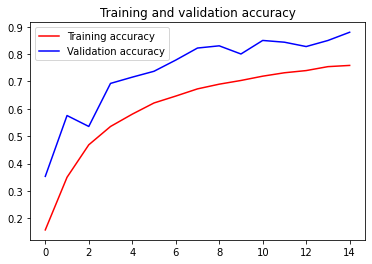

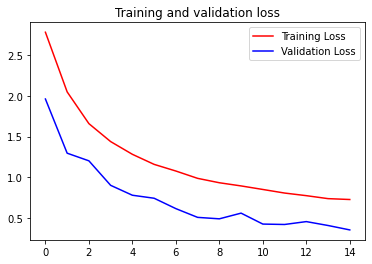

In [ ]:
# Plot the chart for accuracy and loss on both training and validation

import matplotlib.pyplot as plt
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()

plt.plot(epochs, loss, 'r', label='Training Loss')
plt.plot(epochs, val_loss, 'b', label='Validation Loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()